<a href="https://colab.research.google.com/github/mhssain12/wapp/blob/master/neural_network2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import datetime
#import dateuntil
#import pandas
import csv
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
#data = pd.read_csv('solar irradiance data.csv')
#irradiance=pd.read_csv('irradiance.csv', parse_dates=["Date"], index_col="Date")
#irradiance['Date'] = pd.to_date(irradiance['Date'])


import tensorflow as tf


In [0]:
# !pip install tf-nightly-gpu-2.0-preview

In [232]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
# drive.mount("/content/drive", force_remount=True)

In [234]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# # from tensorflow.python.client import device_lib
# # device_lib.list_local_devices()
# drive.mount("/content/drive", force_remount=True)


In [0]:
# !cat /proc/meminfo
# !cat /proc/cpuinfo

In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [0]:
# columns = pd.MultiIndex.from_product([['SRRL', 'NVTFIR', 'STAC', 'NFC', 'SUA'], ['W/m^2', 'Temp']])
# irradiance=pd.read_csv("/content/SRRL.csv") 
irradiance=pd.read_csv("/content/drive/My Drive/MLproject/SRRL.csv") 

In [238]:
tf.__version__

'1.15.0'

In [0]:
# with open('/content/dataonly.csv', newline='') as csvfile:
with open('/content/drive/My Drive/MLproject/dataonly.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))
    
#data.shape()

In [0]:
# irr= pd.DataFrame(pd.read_csv('SRRL.csv'))
irradiance.set_index(['Date', 'Time'], inplace=True)


In [0]:
irradiance.head(5)
index=irradiance.index
columns = pd.MultiIndex.from_product([['SRRL','NVTFIR','STAC','NFC','SUA'], ['W/m^2','Temp']])
# irr=np.array(pd.read_csv("dataonly.csv"))
irr_data = pd.DataFrame(data, index=index, columns=columns)


In [242]:
irr_data['SRRL']['W/m^2']['11/20/2018'].shape

(1440,)

In [0]:
irr_data.head(5)
#ealth_data.shape

irr_data.drop(('STAC', 'W/m^2'), axis=1, inplace=True)
irr_data.drop(('STAC', 'Temp'), axis=1, inplace=True)
irr_data.drop(('NFC', 'W/m^2'), axis=1, inplace=True)
irr_data.drop(('NFC', 'Temp'), axis=1, inplace=True)
irr_data.drop(('SUA', 'Temp'), axis=1, inplace=True)
irr_data.drop(('SUA', 'W/m^2'), axis=1, inplace=True)
irr_data.drop(('NVTFIR', 'W/m^2'), axis=1, inplace=True)
irr_data.drop(('NVTFIR', 'Temp'), axis=1, inplace=True)
# irr_data.drop(('SRRL', 'Temp'), axis=1, inplace=True)


In [244]:
df=irr_data.astype(float)
df['SRRL']['W/m^2'].describe()

count    527040.000000
mean        191.351316
std         285.610154
min          -4.547070
25%          -0.637054
50%           4.941690
75%         321.226000
max        1473.880000
Name: W/m^2, dtype: float64

In [0]:
#df['NVTFIR']['W/m^2'].describe()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fda8c7413c8>,
      dtype=object)

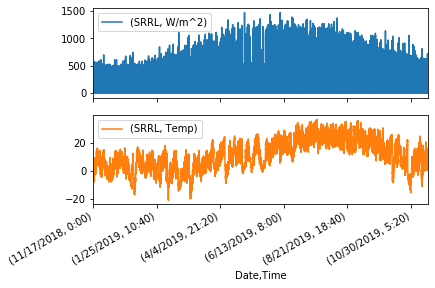

In [245]:
# df['SRRL']['Temp'].plot()
df.plot(subplots=True)

In [246]:
df.values
# c1=df.columns.get_level_values(1)
# c0=df.columns.get_level_values(0)
# c1[0:7]
# c0 [0:7]

array([[-0.455377,  2.332   ],
       [-0.416394,  2.331   ],
       [-0.447358,  2.348   ],
       ...,
       [-1.17693 , 12.89    ],
       [-1.17728 , 12.89    ],
       [-1.17782 , 12.82    ]])

In [0]:
l0 = irradiance.index.get_level_values(0)
l1 = irradiance.index.get_level_values(1)
# l1

In [0]:
df=df.loc[pd.IndexSlice[:, l1[420:1009]], :]
# df=df.loc[pd.IndexSlice[:, l1[420:901]], pd.IndexSlice[c0[0:7][:],c1[0:7][:]]]
# df=df.loc[pd.IndexSlice[:, l1[420:901]], columns.get_level_values(1).isin({"W/m^2", "Temp"}) ]


In [249]:
df.tail()


SRRL       
                    W/m^2   Temp
Date       Time                 
11/17/2019 16:44  5.19640  13.22
           16:45  4.78308  13.19
           16:46  4.66087  13.17
           16:47  4.62474  13.17
           16:48  4.51982  13.14

In [250]:
# df['Various', 'Min']=df.index.labels[1]
# df['Various', 'Day']=df.index.labels[0]
df['SRRL']['W/m^2']['11/17/2019'].shape
k1=df.index.labels[0]
l1 = irradiance.index.get_level_values(0)
l1
# l1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  


Index(['11/17/2018', '11/17/2018', '11/17/2018', '11/17/2018', '11/17/2018',
       '11/17/2018', '11/17/2018', '11/17/2018', '11/17/2018', '11/17/2018',
       ...
       '11/17/2019', '11/17/2019', '11/17/2019', '11/17/2019', '11/17/2019',
       '11/17/2019', '11/17/2019', '11/17/2019', '11/17/2019', '11/17/2019'],
      dtype='object', name='Date', length=527040)

In [251]:
df.head()

SRRL       
                    W/m^2   Temp
Date       Time                 
11/17/2018 7:00  0.498039 -0.611
           7:01  0.510486 -0.606
           7:02  0.589566 -0.598
           7:03  0.653437 -0.609
           7:04  0.705921 -0.637

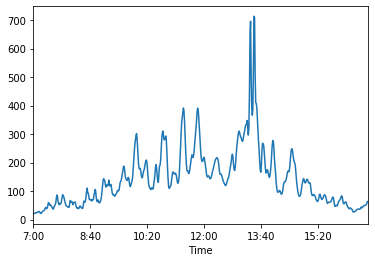

In [252]:
df['SRRL']['W/m^2']['11/20/2018'].shape
df['SRRL']['W/m^2']['5/20/2019'].plot()

In [0]:
#df['Various']['Day'].plot()

In [0]:
target_station= 'SRRL'

In [0]:
target_names= ['W/m^2', 'Temp']

# target_names= ['W/m^2']

In [0]:
shift_days=1
shift_steps= shift_days*589  #Number of minutes

In [0]:
df_targets = df[target_station][target_names].shift(-shift_steps)

In [258]:
df[target_station][target_names].head(shift_steps + 5)

W/m^2   Temp
Date       Time                  
11/17/2018 7:00   0.498039 -0.611
           7:01   0.510486 -0.606
           7:02   0.589566 -0.598
           7:03   0.653437 -0.609
           7:04   0.705921 -0.637
...                    ...    ...
11/18/2018 7:00  28.519400 -6.983
           7:01  30.686500 -6.957
           7:02  33.135300 -6.914
           7:03  35.501700 -6.771
           7:04  37.631700 -6.724

[594 rows x 2 columns]

In [259]:
df_targets.head(5)

W/m^2   Temp
Date       Time                
11/17/2018 7:00  28.5194 -6.983
           7:01  30.6865 -6.957
           7:02  33.1353 -6.914
           7:03  35.5017 -6.771
           7:04  37.6317 -6.724

In [260]:
df_targets.tail()

W/m^2  Temp
Date       Time              
11/17/2019 16:44    NaN   NaN
           16:45    NaN   NaN
           16:46    NaN   NaN
           16:47    NaN   NaN
           16:48    NaN   NaN

In [0]:
x_data = df.values[0:-shift_steps]

# x_data.plot()

In [262]:
print(type(x_data))
print("Shape:", x_data.shape)

<class 'numpy.ndarray'>
Shape: (214985, 2)


In [0]:
y_data = df_targets.values[:-shift_steps]

In [264]:
print(type(y_data))
print("Shape:", y_data.shape)

<class 'numpy.ndarray'>
Shape: (214985, 2)


## This is the number of observations (aka. data-points or samples) in the data-set:

In [265]:
num_data = len(x_data)
num_data

214985

In [0]:
train_split = 0.9

## This is the number of observations in the training-set:

In [267]:
num_train = int(train_split * num_data)
num_train

193486

## This is the number of observations in the test-set:

In [268]:
num_test = num_data - num_train
num_test

21499

##  These are the input-signals for the training- and test-sets:

In [269]:
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)

214985

## These are the output-signals for the training- and test-sets:

In [270]:
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)

214985

## This is the number of input-signals:

In [271]:
num_x_signals = x_data.shape[1]
num_x_signals

2

## This is the number of output-signals:

In [272]:
num_y_signals = y_data.shape[1]
num_y_signals

2

## Scaled data

#### The data-set contains a wide range of values:

In [273]:
print("Min:", np.min(x_train))
print("Max:", np.max(x_train))

Min: -20.97
Max: 1473.88


The neural network works best on values roughly between -1 and 1, so we need to scale the data before it is being input to the neural network. We can use scikit-learn for this.

We first create a scaler-object for the input-signals.

In [0]:
x_scaler = MinMaxScaler()

## We then detect the range of values from the training-data and scale the training-data.

In [0]:
x_train_scaled = x_scaler.fit_transform(x_train)

## part from a small rounding-error, the data has been scaled to be between 0 and 1.

In [276]:
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0


##  We use the same scaler-object for the input-signals in the test-set.

In [0]:
x_test_scaled = x_scaler.transform(x_test)

In [0]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

## Data Generator

The data-set has now been prepared as 2-dimensional numpy arrays. The training-data has almost 300k observations, consisting of 20 input-signals and 3 output-signals.

These are the array-shapes of the input and output data:

In [279]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(193486, 2)
(193486, 2)


Instead of training the Recurrent Neural Network on the complete sequences of almost 300k observations, we will use the following function to create a batch of shorter sub-sequences picked at random from the training-data.

In [0]:
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)
        

We will use a large batch-size so as to keep the GPU near 100% work-load. You may have to adjust this number depending on your GPU, its RAM and your choice of sequence_length below.

In [0]:
batch_size = 100

#### We will use a sequence-length of 80640, which means that each random sequence contains observations for 8 weeks. One time-step corresponds to one hour, so 24 x 7 time-steps corresponds to a week, and 24 x 7 x 8 corresponds to 8 weeks.

In [282]:
sequence_length = 589 * 7 * 5
sequence_length

20615

## We then create the batch-generator.

In [0]:
generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

We can then test the batch-generator to see if it works.

In [0]:
x_batch, y_batch = next(generator)

This gives us a random batch of 256 sequences, each sequence having 80640 observations, and each observation having 8 input-signals and 3 output-signals.

In [285]:
print(x_batch.shape)
print(y_batch.shape)

(100, 20615, 2)
(100, 20615, 2)


## We can plot one of the 20 input-signals as an example.

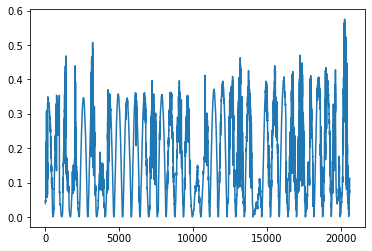

In [286]:
batch = 0   # First sequence in the batch.
signal = 0  # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)

We can also plot one of the output-signals that we want the model to learn how to predict given all those 20 input signals.

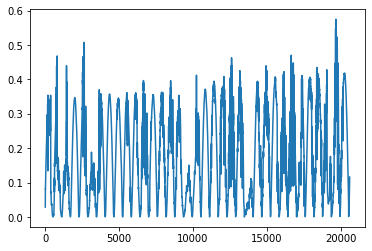

In [287]:
seq = y_batch[batch, :, signal]
plt.plot(seq)

## Validation Set

The neural network trains quickly so we can easily run many training epochs. But then there is a risk of overfitting the model to the training-set so it does not generalize well to unseen data. We will therefore monitor the model's performance on the test-set after each epoch and only save the model's weights if the performance is improved on the test-set.

The batch-generator randomly selects a batch of short sequences from the training-data and uses that during training. But for the validation-data we will instead run through the entire sequence from the test-set and measure the prediction accuracy on that entire sequence.

In [288]:
validation_data = (np.expand_dims(x_test_scaled, axis=0), np.expand_dims(y_test_scaled, axis=0))
validation_data

(array([[[0.52966009, 0.46890625],
         [0.53009212, 0.47126736],
         [0.5300616 , 0.47338542],
         ...,
         [0.001692  , 0.55416667],
         [0.00153302, 0.55347222],
         [0.00133879, 0.55329861]]]), array([[[0.51968198, 0.659375  ],
         [0.51990511, 0.659375  ],
         [0.5199397 , 0.65920139],
         ...,
         [0.00353232, 0.59270833],
         [0.00350782, 0.59270833],
         [0.00343666, 0.5921875 ]]]))

## Create the Recurrent Neural Network

We are now ready to create the Recurrent Neural Network (RNN). We will use the Keras API for this because of its simplicity. See Tutorial #03-C for a tutorial on Keras and Tutorial #20 for more information on Recurrent Neural Networks.

In [0]:
model = Sequential()


We can now add a Gated Recurrent Unit (GRU) to the network. This will have 512 outputs for each time-step in the sequence.

Note that because this is the first layer in the model, Keras needs to know the shape of its input, which is a batch of sequences of arbitrary length (indicated by None), where each observation has a number of input-signals (num_x_signals).

In [0]:
# TOTAL_INPUTS_row=589 * 7 * 5
TOTAL_INPUTS=2

In [0]:
# model.add(Dense(units=256,
#               return_sequences=True,
#               input_shape=(None, num_x_signals,)))


model.add(Dense(units= 520,
              
              input_shape=(None, num_x_signals,)))

# model.add(Dense(units=None, input_shape=(None, num_x_signals,)))

# Original one
# model.add(Dense(units=512,
              
#               input_shape=(None, num_x_signals,)))

# model.add(Dense(512,
              
#                input_dim=TOTAL_INPUTS))

# model.add(Dense(units=256, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden1'))

In [0]:
model.add(Dense(256, activation='relu', name='m1_hidden1'))
model.add(Dense(128, activation='relu', name='m1_hidden2'))
model.add(Dense(64, activation='relu', name='m1_hidden3'))
model.add(Dense(32, activation='relu', name='m1_hidden4'))
model.add(Dense(10, activation='relu', name='m1_hidden5'))
model.add(Dense(5, activation='relu', name='m1_hidden6'))

# model.add(Dense(128, activation='relu', name='m1_hidden2'))
# model.add(Dense(64, activation='relu', name='m1_hidden3'))
# model.add(Dense(32, activation='relu', name='m1_hidden4'))
# model.add(Dense(10, activation='relu', name='m1_hidden5'))

The GRU outputs a batch of sequences of 512 values. We want to predict 3 output-signals, so we add a fully-connected (or dense) layer which maps 512 values down to only 3 values.

The output-signals in the data-set have been limited to be between 0 and 1 using a scaler-object. So we also limit the output of the neural network using the Sigmoid activation function, which squashes the output to be between 0 and 1.

In [0]:
model.add(Dense(num_y_signals, activation='sigmoid'))

A problem with using the Sigmoid activation function, is that we can now only output values in the same range as the training-data.

For example, if the training-data only has temperatures between -20 and +30 degrees, then the scaler-object will map -20 to 0 and +30 to 1. So if we limit the output of the neural network to be between 0 and 1 using the Sigmoid function, this can only be mapped back to temperature values between -20 and +30.

We can use a linear activation function on the output instead. This allows for the output to take on arbitrary values. It might work with the standard initialization for a simple network architecture, but for more complicated network architectures e.g. with more layers, it might be necessary to initialize the weights with smaller values to avoid NaN values during training. You may need to experiment with this to get it working.

In [0]:
if False:
    from tensorflow.python.keras.initializers import RandomUniform

    # Maybe use lower init-ranges.
    init = RandomUniform(minval=-0.05, maxval=0.05)

    model.add(Dense(num_y_signals,
                    activation='linear',
                    kernel_initializer=init))

## Loss Function

We will use Mean Squared Error (MSE) as the loss-function that will be minimized. This measures how closely the model's output matches the true output signals.

However, at the beginning of a sequence, the model has only seen input-signals for a few time-steps, so its generated output may be very inaccurate. Using the loss-value for the early time-steps may cause the model to distort its later output. We therefore give the model a "warmup-period" of 50 time-steps where we don't use its accuracy in the loss-function, in hope of improving the accuracy for later time-steps.

In [0]:
warmup_steps = 50

In [0]:
def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    
    y_true is the desired output.
    y_pred is the model's output.
    """

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculate the MSE loss for each value in these tensors.
    # This outputs a 3-rank tensor of the same shape.
    loss = tf.losses.mean_squared_error(labels=y_true_slice,
                                        predictions=y_pred_slice)

    # Keras may reduce this across the first axis (the batch)
    # but the semantics are unclear, so to be sure we use
    # the loss across the entire tensor, we reduce it to a
    # single scalar with the mean function.
    loss_mean = tf.reduce_mean(loss)

    return loss_mean

## Compile the model

#### This is the optimizer and the beginning learning-rate that we will use.

In [0]:
optimizer = RMSprop(lr=1e-4)    #learning rate has been change to 1e-2 from 1e-3

### We then compile the Keras model so it is ready for training.

In [0]:
model.compile(loss=loss_mse_warmup, optimizer=optimizer, 
                metrics=['accuracy'])
# model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, 
#                 metrics=['accuracy'])


This is a very small model with only two layers. The output shape of (None, None, 3) means that the model will output a batch with an arbitrary number of sequences, each of which has an arbitrary number of observations, and each observation has 3 signals. This corresponds to the 3 target signals we want to predict.

In [299]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, None, 520)         1560      
_________________________________________________________________
m1_hidden1 (Dense)           (None, None, 256)         133376    
_________________________________________________________________
m1_hidden2 (Dense)           (None, None, 128)         32896     
_________________________________________________________________
m1_hidden3 (Dense)           (None, None, 64)          8256      
_________________________________________________________________
m1_hidden4 (Dense)           (None, None, 32)          2080      
_________________________________________________________________
m1_hidden5 (Dense)           (None, None, 10)          330       
_________________________________________________________________
m1_hidden6 (Dense)           (None, None, 5)          

## Callback Functions

During training we want to save checkpoints and log the progress to TensorBoard so we create the appropriate callbacks for Keras.

This is the callback for writing checkpoints during training.

In [0]:
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

This is the callback for stopping the optimization when performance worsens on the validation-set.

In [0]:
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=30, verbose=1)   # changed patience from 5 to 15



This is the callback for writing the TensorBoard log during training.

In [0]:
callback_tensorboard = TensorBoard(log_dir='./23_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

This callback reduces the learning-rate for the optimizer if the validation-loss has not improved since the last epoch (as indicated by patience=0). The learning-rate will be reduced by multiplying it with the given factor. We set a start learning-rate of 1e-3 above, so multiplying it by 0.1 gives a learning-rate of 1e-4. We don't want the learning-rate to go any lower than this.

In [0]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.2,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)
# factor in increased from 0.01 to 0.2

In [0]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

## Train the Recurrent Neural Network

We can now train the neural network.

Note that a single "epoch" does not correspond to a single processing of the training-set, because of how the batch-generator randomly selects sub-sequences from the training-set. Instead we have selected steps_per_epoch so that one "epoch" is processed in a few minutes.

With these settings, each "epoch" took about 2.5 minutes to process on a GTX 1070. After 14 "epochs" the optimization was stopped because the validation-loss had not decreased for 5 "epochs". This optimization took about 35 minutes to finish.

Also note that the loss sometimes becomes NaN (not-a-number). This is often resolved by restarting and running the Notebook again. But it may also be caused by your neural network architecture, learning-rate, batch-size, sequence-length, etc. in which case you may have to modify those settings.

In [305]:
%%time
model.fit_generator(generator=generator,
                    epochs=20,
                    steps_per_epoch=200,
                    validation_data=validation_data,
                    callbacks=callbacks,
                    )

Epoch 1/20
  1/200 [..............................] - ETA: 24s - loss: 0.0211 - acc: 0.9300
Epoch 00001: val_loss improved from inf to 0.02109, saving model to 23_checkpoint.keras
200/200 [==============================] - 130s 650ms/step - loss: 0.0371 - acc: 0.9143 - val_loss: 0.0211 - val_acc: 0.9300
Epoch 2/20
  1/200 [..............................] - ETA: 1s - loss: 0.0218 - acc: 0.9361
Epoch 00002: val_loss did not improve from 0.02109
200/200 [==============================] - 129s 644ms/step - loss: 0.0207 - acc: 0.9161 - val_loss: 0.0218 - val_acc: 0.9361
Epoch 3/20
  1/200 [..............................] - ETA: 1s - loss: 0.0216 - acc: 0.9362
Epoch 00003: val_loss did not improve from 0.02109
200/200 [==============================] - 129s 643ms/step - loss: 0.0204 - acc: 0.9195 - val_loss: 0.0216 - val_acc: 0.9362
Epoch 4/20
  1/200 [..............................] - ETA: 1s - loss: 0.0211 - acc: 0.9351
Epoch 00004: val_loss improved from 0.02109 to 0.02105, saving model t

In [0]:
try:
    model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

## Performance Test

We can now evaluate the model's performance on the test-set. This function expects a batch of data, but we will just use one long time-series for the test-set, so we just expand the array-dimensionality to create a batch with that one sequence.

In [307]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 0s 9ms/sample - loss: 0.0196 - acc: 0.9364


In [308]:
print("loss (test-set):", result)

loss (test-set): [0.019649410620331764, 0.9363691]


## Generate Predictions

In [0]:
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
    # For each output-signal.
    for signal in range(len(target_names)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_names[signal])
        plt.legend()
        plt.show()

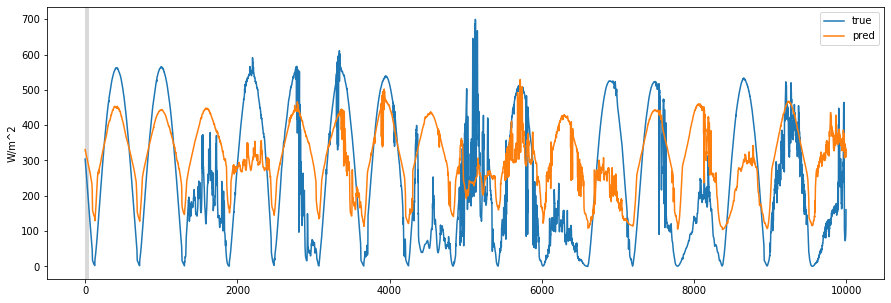

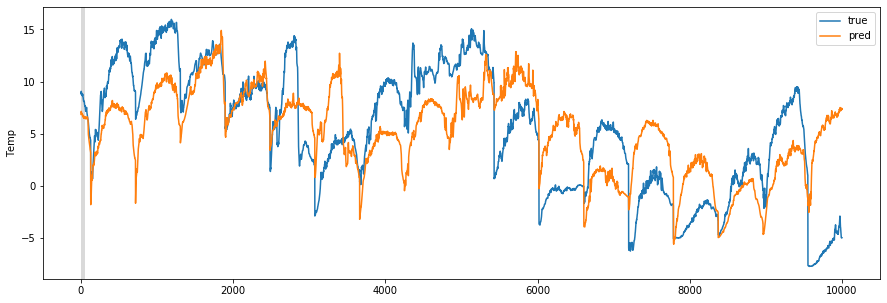

In [310]:
# plot_comparison(start_idx=100000, length=1000), train=True)

plot_comparison(start_idx=1050, length=10000, train=True)

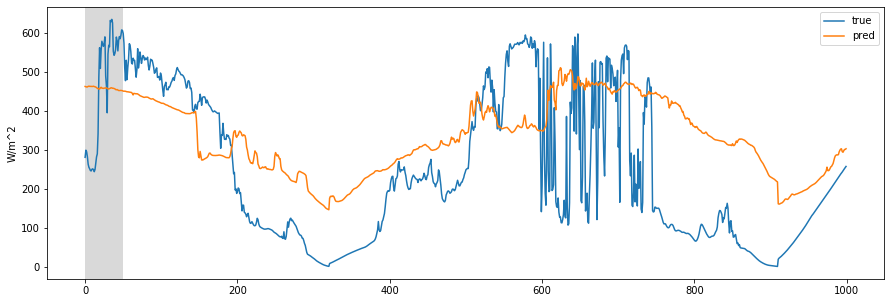

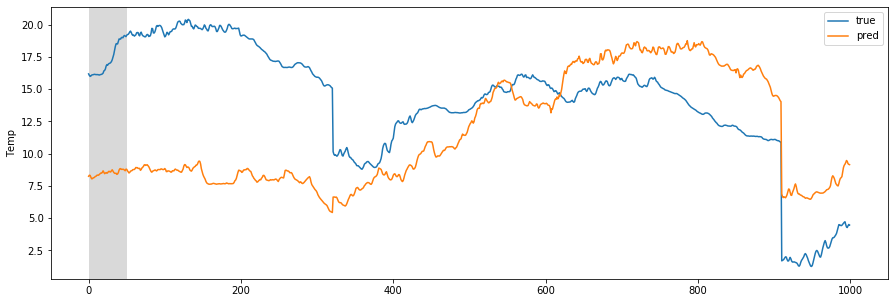

In [311]:
plot_comparison(start_idx=20000, length=1000, train=False)